In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline

In [2]:
data_csv=Path("C:\\Users\\vinot\\Fintech\\WorkBook\\Homework_Workout\\Time_Series_HW\\yen.csv")
yen_data=pd.read_csv(data_csv,parse_dates=True, index_col="Date")

In [3]:
yen_data.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1976-08-02,3398.0,3401.0,3398.0,3401.0,NaN,3401.0,2.0,1.0
1976-08-03,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-04,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-05,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-06,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0


In [4]:
yen_futures=yen_data.loc["1990-01-01":,:]

In [5]:
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1990-01-02,6954.0,6954.0,6835.0,6847.0,NaN,6847.0,48336.0,51473.0
1990-01-03,6877.0,6910.0,6865.0,6887.0,NaN,6887.0,38206.0,53860.0
1990-01-04,6937.0,7030.0,6924.0,7008.0,NaN,7008.0,49649.0,55699.0
1990-01-05,6952.0,6985.0,6942.0,6950.0,NaN,6950.0,29944.0,53111.0
1990-01-08,6936.0,6972.0,6936.0,6959.0,NaN,6959.0,19763.0,52072.0


In [6]:
yen_futures.tail()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
2019-10-09,9381.0,9391.5,9330.5,9343.5,38.5,9338.0,99153.0,145470.0
2019-10-10,9343.5,9380.5,9293.5,9301.0,34.5,9303.5,159397.0,144474.0
2019-10-11,9308.5,9309.0,9240.0,9267.0,52.5,9251.0,158810.0,147471.0
2019-10-14,9259.0,9292.0,9250.5,9261.0,14.0,9265.0,69457.0,153902.0
2019-10-15,9264.5,9280.0,9216.5,9220.0,43.5,9221.5,108342.0,151564.0


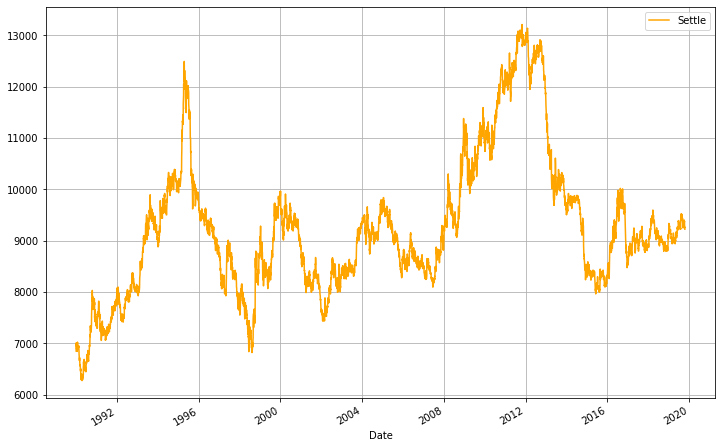

In [18]:
ax=yen_futures['Settle'].plot(figsize=(12,8),color="Orange",legend=True);
ax.xaxis.grid(True)
ax.yaxis.grid(True)

In [19]:
import statsmodels.api as sm
ts_noise,ts_trend=sm.tsa.filters.hpfilter(yen_futures['Settle'])

In [29]:
yen_upd=pd.DataFrame({
    "Noise":ts_noise,
    "Trend":ts_trend,
})

In [30]:
yen_upd['Settle']=yen_futures['Settle']

In [31]:
yen_upd.head()

,Noise,Trend,Settle
Date,,,
1990-01-02,-61.503967,6908.503967,6847.0
1990-01-03,-21.799756,6908.799756,6887.0
1990-01-04,98.942896,6909.057104,7008.0
1990-01-05,40.776052,6909.223948,6950.0
1990-01-08,49.689938,6909.310062,6959.0


In [32]:
yen_upd.tail()

,Noise,Trend,Settle
Date,,,
2019-10-09,24.939247,9313.060753,9338.0
2019-10-10,-5.868559,9309.368559,9303.5
2019-10-11,-54.454594,9305.454594,9251.0
2019-10-14,-36.423060,9301.423060,9265.0
2019-10-15,-75.844123,9297.344123,9221.5


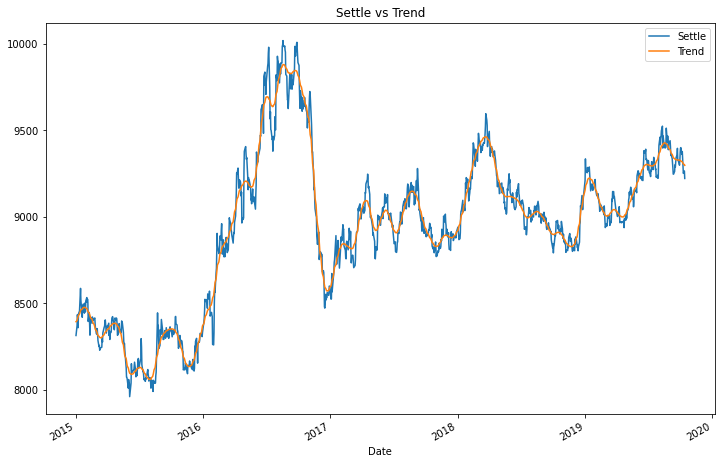

In [42]:
ax=yen_upd[['Settle','Trend']]['2015-01-01':].plot(figsize=(12,8),legend=True,title="Settle vs Trend");

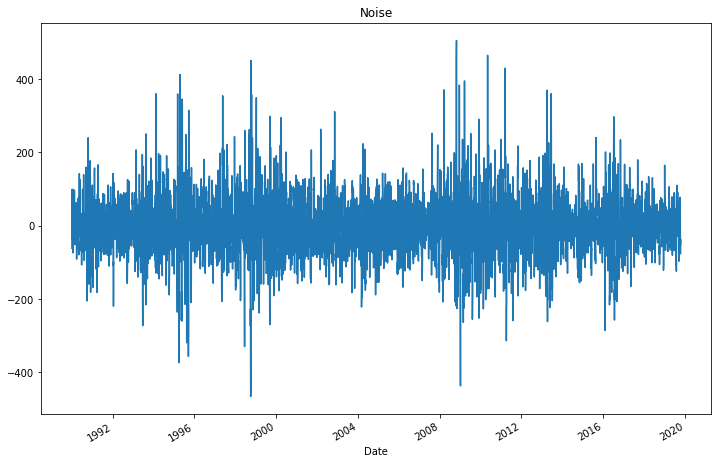

In [46]:
yen_upd['Noise'].plot(figsize=(12,8),title="Noise");

## Forcasting Returns using an ARMA Model

In [47]:
from statsmodels.tsa.arima_model import ARMA

In [49]:
returns=(yen_upd[['Settle']].pct_change()*100)

In [50]:
returns.head()

,Settle
Date,
1990-01-02,NaN
1990-01-03,0.584197
1990-01-04,1.756933
1990-01-05,-0.827626
1990-01-08,0.129496


In [51]:
returns=returns.replace(-np.inf,np.nan).dropna()

In [52]:
returns.tail()

,Settle
Date,
2019-10-09,-0.410601
2019-10-10,-0.369458
2019-10-11,-0.564304
2019-10-14,0.151335
2019-10-15,-0.469509


In [55]:
import warnings
warnings.filterwarnings('ignore')

In [56]:
model = ARMA(returns.values, order=(2,1))

In [57]:
results=model.fit()

In [58]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 7514
Model:                     ARMA(2, 1)   Log Likelihood               -7894.071
Method:                       css-mle   S.D. of innovations              0.692
Date:                Mon, 26 Oct 2020   AIC                          15798.142
Time:                        23:37:00   BIC                          15832.765
Sample:                             0   HQIC                         15810.030
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0063      0.008      0.804      0.421      -0.009       0.022
ar.L1.y       -0.3062      1.277     -0.240      0.811      -2.810       2.198
ar.L2.y       -0.0019      0.019     -0.099      0.921      -0.040       0.036
ma.L1.y        0.2946      1.277      0.231      0.818      -2.209       2.798
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -3.3354           +0.0000j            3.3354            0.5000
AR.2         -157.1951           +0.0000j          157.1951            0.5000
MA.1           -3.3943           +0.0000j            3.3943            0.5000
-----------------------------------------------------------------------------
"""

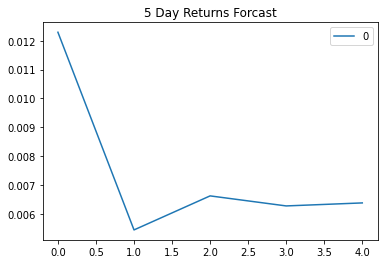

In [62]:
pd.DataFrame(results.forecast(steps=5)[0]).plot(title="5 Day Returns Forcast");

## Forecasting the Settle Price using an ARIMA Model

In [63]:
from statsmodels.tsa.arima_model import ARIMA

In [68]:
model = ARIMA(yen_futures['Settle'], order=(5, 1, 1))

In [69]:
results_1=model.fit()

In [70]:
results_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.Settle   No. Observations:                 7514
Model:                 ARIMA(5, 1, 1)   Log Likelihood              -41944.619
Method:                       css-mle   S.D. of innovations             64.281
Date:                Mon, 26 Oct 2020   AIC                          83905.238
Time:                        23:43:42   BIC                          83960.635
Sample:                             1   HQIC                         83924.259
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3160      0.700      0.451      0.652      -1.056       1.688
ar.L1.D.Settle     0.2823      0.699      0.404      0.686      -1.088       1.652
ar.L2.D.Settle     0.0007      0.016      0.043      0.966      -0.030       0.032
ar.L3.D.Settle    -0.0126      0.012     -1.032      0.302      -0.037       0.011
ar.L4.D.Settle    -0.0137      0.015     -0.889      0.374      -0.044       0.016
ar.L5.D.Settle    -0.0012      0.018     -0.064      0.949      -0.036       0.034
ma.L1.D.Settle    -0.2973      0.699     -0.425      0.671      -1.667       1.073
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.8919           -1.3785j            2.3408           -0.1002
AR.2            1.8919           +1.3785j            2.3408            0.1002
AR.3           -2.2706           -3.0202j            3.7785           -0.3526
AR.4           -2.2706           +3.0202j            3.7785            0.3526
AR.5          -11.0888           -0.0000j           11.0888           -0.5000
MA.1            3.3635           +0.0000j            3.3635            0.0000
-----------------------------------------------------------------------------
"""

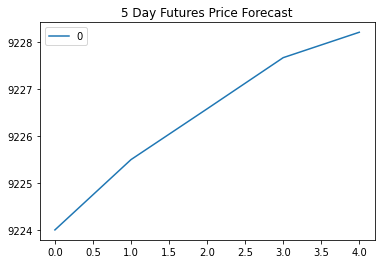

In [73]:
pd.DataFrame(results_1.forecast(steps=5)[0]).plot(title="5 Day Futures Price Forecast");

## Volatility Forecasting with GARCH

In [77]:
from arch import arch_model


In [79]:
model = arch_model(returns, mean="Zero", vol="GARCH", p=2, q=1)

In [80]:
result_3=model.fit(disp="off")

In [81]:
result_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                 Settle   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7461.93
Distribution:                  Normal   AIC:                           14931.9
Method:            Maximum Likelihood   BIC:                           14959.6
                                        No. Observations:                 7514
Date:                Mon, Oct 26 2020   Df Residuals:                     7510
Time:                        23:54:46   Df Model:                            4
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      4.2896e-03  2.057e-03      2.085  3.708e-02  [2.571e-04,8.322e-03]
alpha[1]       0.0381  1.282e-02      2.970  2.974e-03  [1.295e-02,6.321e-02]
alpha[2]       0.0000  1.703e-02      0.000      1.000 [-3.338e-02,3.338e-02]
beta[1]        0.9536  1.420e-02     67.135      0.000      [  0.926,  0.981]
=============================================================================

Covariance estimator: robust
"""

In [82]:
last_day = returns.index.max().strftime('%Y-%m-%d')
last_day

'2019-10-15'

In [84]:
forecast_horizon = 5
forecasts = result_3.forecast(start='2019-10-15', horizon=forecast_horizon)
forecasts 

In [85]:
intermediate = np.sqrt(forecasts.variance.dropna() * 252)
intermediate

,h.1,h.2,h.3,h.4,h.5
Date,,,,,
2019-10-15,7.434048,7.475745,7.516867,7.557426,7.597434


##  Visualizing the forecast

In [87]:
final = intermediate.dropna().T
final

Date,2019-10-15
h.1,7.434048
h.2,7.475745
h.3,7.516867
h.4,7.557426
h.5,7.597434


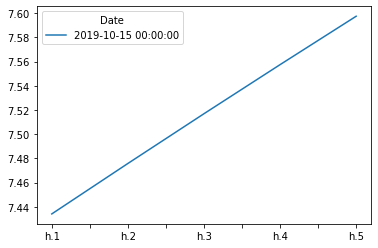

In [89]:
final.plot();

## Conclusion

Based on your time series analysis, would you buy the yen now?

Is the risk of the yen expected to increase or decrease?

Based on the model evaluation, would you feel confident in using these models for trading?